# Data gathering

## Imports

In [1]:
#%matplotlib inline
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
from matplotlib.ticker import FormatStrFormatter

params = {'axes.labelsize': 'large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pl.rcParams.update(params)

unfiltered_data = pd.read_table('final_data_updated.csv', delimiter=',')

## Remove corrupted or invalid data

In [2]:
invalid_value_mask = np.equal(unfiltered_data, -1)
invalid_rows_mask = np.any(invalid_value_mask, axis=1)
data = unfiltered_data[~invalid_rows_mask]

## Specific projects

In [3]:
data = data.loc[data['Project'].isin(['Math', 'Time', 'Lang', 'Closure', 'Chart'])]
print(data['Project'].unique())

['Chart' 'Closure' 'Lang' 'Math' 'Time']


## Label & Dataset

In [4]:
# Change here to set another label: L-1, L-3, L-4, L-5, L-5-10, L-10
label = 'L-10'
X = data.filter(regex="(S|D|T|B)-.*")

y = data[label]

# Automatic Feature Combiner

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

def createTestSet(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return (X_train, X_test, y_train, y_test)

In [ ]:
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

possible_features = data.filter(regex="(S|D|T|B)-.*")

def logistic_regression():
    return LogisticRegression()

def decision_tree():
    return DecisionTreeClassifier(**dt_parameter)

def kNN():
    return KNeighborsClassifier(20)

def bayesian():
    return GaussianNB()

def forest():
    return RandomForestClassifier(**dt_parameter)

# OPTIONS
y = data['L-10']
func = bayesian
repetitions = 100
max_features = 10
min_features = 3

max_scoreTe = 0
best_features = []
for L in range(min_features, max_features):
    for subset in itertools.combinations(possible_features, L):
        scoreTe = 0
        for i in range(0,repetitions):
            # Get data
            X = data[list(subset)]
            X_train, X_test, y_train, y_test = createTestSet(X,y)
            model = func()
            model.fit(X_train, y_train)
            scoreTe += model.score(X_test, y_test)
        scoreTe /= repetitions 
        if scoreTe > max_scoreTe:
            max_scoreTe = scoreTe
            best_features = subset
            print("**Test Score**: " + str(scoreTe))
            print("**Features**:")
            print(list(best_features))
            print("")

# Results

Tested for 4 days on 4 servers on AWS EC2 servers.  
I used the dynamic callgraphs _with_ resource edges.

## Linear Regression

**Test Score**: 0.7952238805970147  
**Features**: 
['S-WordCount', 'S-LineCount', 'S-Density']  

**Test Score**: 0.8055223880597018  
**Features**: 
['S-WordCount', 'S-LineCount', 'D-DiDiameter']  

**Test Score**: 0.8286567164179099  
**Features**: 
['S-WordCount', 'S-LineCount', 'D-#AboveAvgD']  

**Test Score**: 0.8471641791044773  
**Features**:
['S-WordCount', 'S-LineCount', 'T-#E']  

**Test Score**: 0.8501492537313432  
**Features**:
['S-WordCount', 'S-Density', 'D-#AboveAvgD']  

**Test Score**: 0.850746268656716  
**Features**:
['S-WordCount', 'S-FunCalls', 'T-AvgVEFT']  

**Test Score**: 0.8516417910447761  
**Features**:
['S-WordCount', 'S-ComPer', 'T-#E']  

**Test Score**: 0.858059701492537  
**Features**:
['S-WordCount', 'S-ComPer', 'T-AvgVEFT']  

**Test Score**: 0.8629850746268656  
**Features**:
['S-WordCount', 'D-DiDiameter', 'T-AvgVEFT']  

**Test Score**: 0.8677611940298503  
**Features**:
['S-ComPer', 'D-AvgD', 'T-AvgVEFT']  

**Test Score**: 0.8761194029850747  
**Features**:
['S-ComPer', 'T-AvgVEFT', 'B-Chunks']  

## Decision Tree

**Test Score**: 0.8504477611940296  
**Features**:
['S-WordCount', 'S-ComPer', 'D-AvgD']  

**Test Score**: 0.8517910447761196  
**Features**:
['S-WordCount', 'S-ComPer', 'D-AvgInD']  

**Test Score**: 0.8576119402985074  
**Features**:
['S-WordCount', 'S-ComPer', 'T-#E']  

**Test Score**: 0.8625373134328355  
**Features**:
['S-WordCount', 'T-#E', 'T-CovFT']  

**Test Score**: 0.8635820895522385  
**Features**:
['S-WordCount', 'T-CovFT', 'T-AvgVEPT']  

**Test Score**: 0.8658208955223885  
**Features**:
['S-LineCount', 'T-#E', 'T-CovFT']  

**Test Score**: 0.8662686567164181  
**Features**:
['S-FunCalls', 'D-DiDiameter', 'D-AvgInCloseness']  

**Test Score**: 0.8699999999999999  
**Features**:
['S-ComPer', 'T-CovFT', 'T-AvgVE']  

**Test Score**: 0.8717910447761192  
**Features**:
['D-FaultyOutD', 'D-DiDiameter', 'D-AvgInCloseness']  

**Test Score**: 0.8720895522388059  
**Features**:
['T-#VE', 'T-CovFT', 'B-Files']  

**Test Score**: 0.8738805970149254  
**Features**:
['S-WordCount', 'T-#FT', 'T-#VE', 'T-CovFT']  

## kNN

**Test Score**: 0.8637313432835821  
**Features**:
['S-WordCount', 'D-FaultyOutD', 'T-AvgVEFT']  

**Test Score**: 0.8662686567164178  
**Features**:
['S-WordCount', 'D-AvgOutCloseness', 'T-AvgVEFT']  

**Test Score**: 0.8670149253731344  
**Features**:
['S-LineCount', 'S-Density', 'T-AvgVEFT']  

**Test Score**: 0.8692537313432838  
**Features**:
['S-LineCount', 'S-ComPer', 'T-AvgVEFT']  

**Test Score**: 0.870149253731343  
**Features**:
['S-LineCount', 'T-AvgVEFT', 'B-Chunks']  

**Test Score**: 0.8705970149253729  
**Features**:
['S-VarCount', 'D-WeiEdgeSum', 'T-AvgVEFT']  

**Test Score**: 0.8705970149253737  
**Features**:
['S-VarCount', 'D-#DiCircles', 'T-AvgVEFT']  

**Test Score**: 0.8740298507462684  
**Features**:
['S-VarCount', 'T-AvgVEFT', 'B-Chunks']  

**Test Score**: 0.8773134328358208  
**Features**:
['S-ComPer', 'T-%FT', 'T-AvgVEFT']  

**Test Score**: 0.8791044776119401  
**Features**:
['S-WordCount', 'T-AvgVEFT', 'T-%VEP^FT', 'B-SizeInLines']  

## Naive Bayesian

**Test Score**: 0.814776119402985  
**Features**:
['S-WordCount', 'S-LineCount', 'D-DiDiameter']  

**Test Score**: 0.822238805970149  
**Features**:
['S-WordCount', 'S-LineCount', 'D-UndiDiameter']  

**Test Score**: 0.8250746268656713  
**Features**:
['S-WordCount', 'S-LineCount', 'T-#E']  

**Test Score**: 0.8258208955223882  
**Features**:
['S-WordCount', 'S-LineCount', 'T-#NVE']  

**Test Score**: 0.8476119402985072  
**Features**:
['S-WordCount', 'S-LineCount', 'T-AvgVEFT']  

**Test Score**: 0.8580597014925373  
**Features**:
['S-WordCount', 'S-Density', 'T-AvgVEFT']  

**Test Score**: 0.8656716417910446  
**Features**:
['S-WordCount', 'S-ParaCount', 'T-AvgVEFT']  

**Test Score**: 0.8705970149253727  
**Features**:
['S-WordCount', 'D-#WeakGroups', 'T-AvgVEFT']  

**Test Score**: 0.8817910447761199  
**Features**:
['S-WordCount', 'T-AvgVEFT', 'B-RepairPatterns']  

**Test Score**: 0.8850746268656715  
**Features**:
['S-MaxDepth', 'T-CovFT', 'T-AvgVEFT']  

In [5]:
data = data.drop('S-WordCount', axis=1) # correlates with S-LineCount
data = data.drop('S-RepWords', axis=1) # correlates with S-WordCount
#data = data.drop('S-FunCalls', axis=1) # correlates with S-ComPer
data = data.drop('S-MaxDepth', axis=1) # correlates with S-BlockCount
data = data.drop('S-CycCom', axis=1) # correlates with S-WordCount
data = data.drop('S-ParaCount', axis=1) # correlates with S-BlockCount
data = data.drop('D-AvgInD', axis=1) # correlates with D-AvgD
data = data.drop('D-AvgOutD', axis=1) # correlates with D-AvgD
data = data.drop('D-FaultyInD', axis=1) # correlates with D-FaultyD
data = data.drop('D-Avg-Closeness', axis=1) # correlates with D-FaultyCloseness
data = data.drop('D-FaultyCloseness', axis=1) # correlates with D-Avg-Closeness
data = data.drop('D-UndiDiameter', axis=1) # correlates with D-Avg-Closeness
data = data.drop('D-WeiEdgeSum', axis=1) # correlates with D-AvgD
data = data.drop('D-AvgInCloseness', axis=1) # correlates with D-Avg-Closeness
data = data.drop('D-AvgOutCloseness', axis=1) # correlates with D-Avg-Closeness
data = data.drop('T-%FT', axis=1) # correlates with T-%PT
data = data.drop('T-#PT', axis=1) # correlates with T-#Tfinal_data
data = data.drop('T-#VE', axis=1) # correlates with T-#E
data = data.drop('T-CovPT', axis=1) # correlates with T-CovT
data = data.drop('T-AvgVE', axis=1) # corrleates with T-AvgVEPT
data = data.drop('T-AvgVEFT', axis=1) # correlates with T-#VEP^FT
data = data.drop('B-SizeInLines', axis=1) # correlates with B-RepairActions
data = data.drop('B-SpreadCodeOnly', axis=1) # correlates with B-SpreadAllLines
data = data.drop('B-LinesAdd', axis=1) # correlates with B-SizeInLines

Optimal number of features : 25


<IPython.core.display.Javascript object>


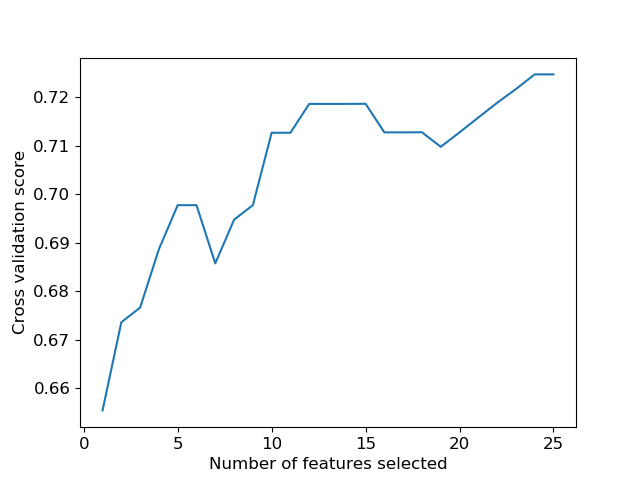

In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

# With test metrics included it takes 
X = data.filter(regex="(D|S|B)-.*")
y = data[label]

svc = SVC(kernel="linear")

rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(3),
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)
optimal_feature_count = rfecv.n_features_

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_);